<a href="https://colab.research.google.com/github/ShubhamSharma2003/Multiclass-Traffic-Flow-Prediction/blob/main/TRAFFIC_FLOW_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic flow prediction

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and understand the data

In [ ]:
data = pd.read_csv('Traffic.csv')

### Getting first 5 rows

In [ ]:
data.head() # to get acquainted with the data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [ ]:
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


### Getting the mean, minimum - maximum and quartiles

In [ ]:
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


# 2. Pre-processing and EDA

### Checking for null values or incomplete data


In [ ]:
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

### The dataset is good to go , now let's perform some eda to find relationships

#### Day vs Traffic

<Axes: xlabel='Day of the week', ylabel='Count'>

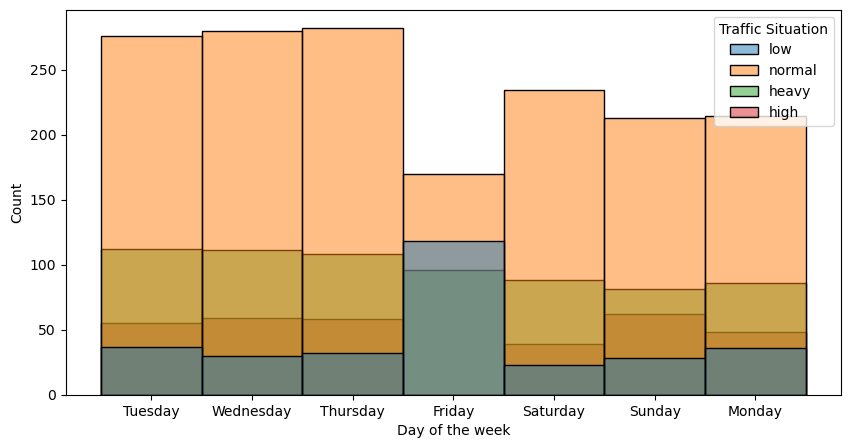

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="Day of the week", hue="Traffic Situation")

### Observations

Number of cars has the most contribution as we can see it has a higher mean than all of the other vehicles

According to the plot:
1. `Wednesday and Thursday` are the most busy days for traffic
2. `Normal traffic` situation counts the most
3. Although there is more heavy traffic on Friday , it sees the `minimim traffic`

#### Date of the month vs Traffic

<Axes: xlabel='Date', ylabel='Count'>

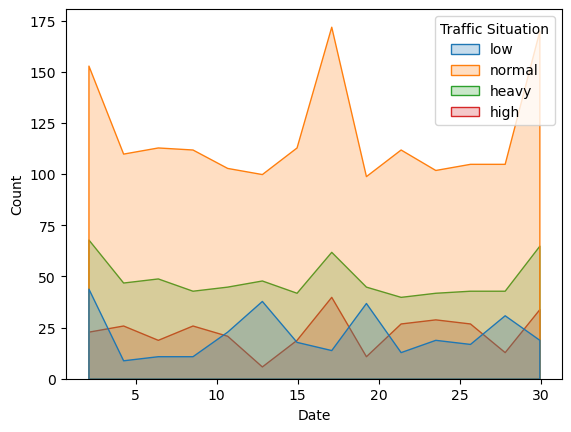

In [ ]:
sns.histplot(data, x="Date", hue="Traffic Situation", element="poly")

### Observation

According to this plot , every part of the month faced similar kind of traffic

#### Time of the day vs Traffic

In [ ]:
# Change time to 24-hour convention
df_copy = data.copy()
times = []
meansOT = ["CarCount", "BikeCount", "BusCount", "TruckCount"]
custom_dict = {"Monday": 0, "Tuesday": 1, "Wednesday":2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}

for time in df_copy["Time"]:
    d = time.split()
    part = d[0].split(":")

    if d[1] == "PM":
        if part[0] != "12":
            part[0] = str(int(part[0]) + 12)
            times.append(":".join(part))
            continue

    if d[1] == "AM" and part[0] == "12" and d[0] != "12:00:00":
            part[0] = str("00")
            times.append(":".join(part))
            continue

    times.append(d[0])

df_copy["Time"] = times

# Sort time
import time
format = '%H:%M:%S'
time_hours = [time.strptime(t, format) for t in df_copy["Time"]]

df_copy["TimeConvert"] = time_hours
df_copy.sort_values(["Day of the week", "TimeConvert"])
grouped_df2 = df_copy.groupby(["Day of the week", "TimeConvert", "Time"]).sum()[meansOT + ["Total"]].sort_values(["Day of the week", "TimeConvert"], key=lambda x: x.map(custom_dict))

In [ ]:
# Aggregate to simplify line plots
grouped_df2.reset_index(inplace=True)
grouped_df2

hours = []
# New columns to agg
for time in grouped_df2["Time"]:
    hours.append(int(time.split(":")[0]))

grouped_df2["Hour"] = hours

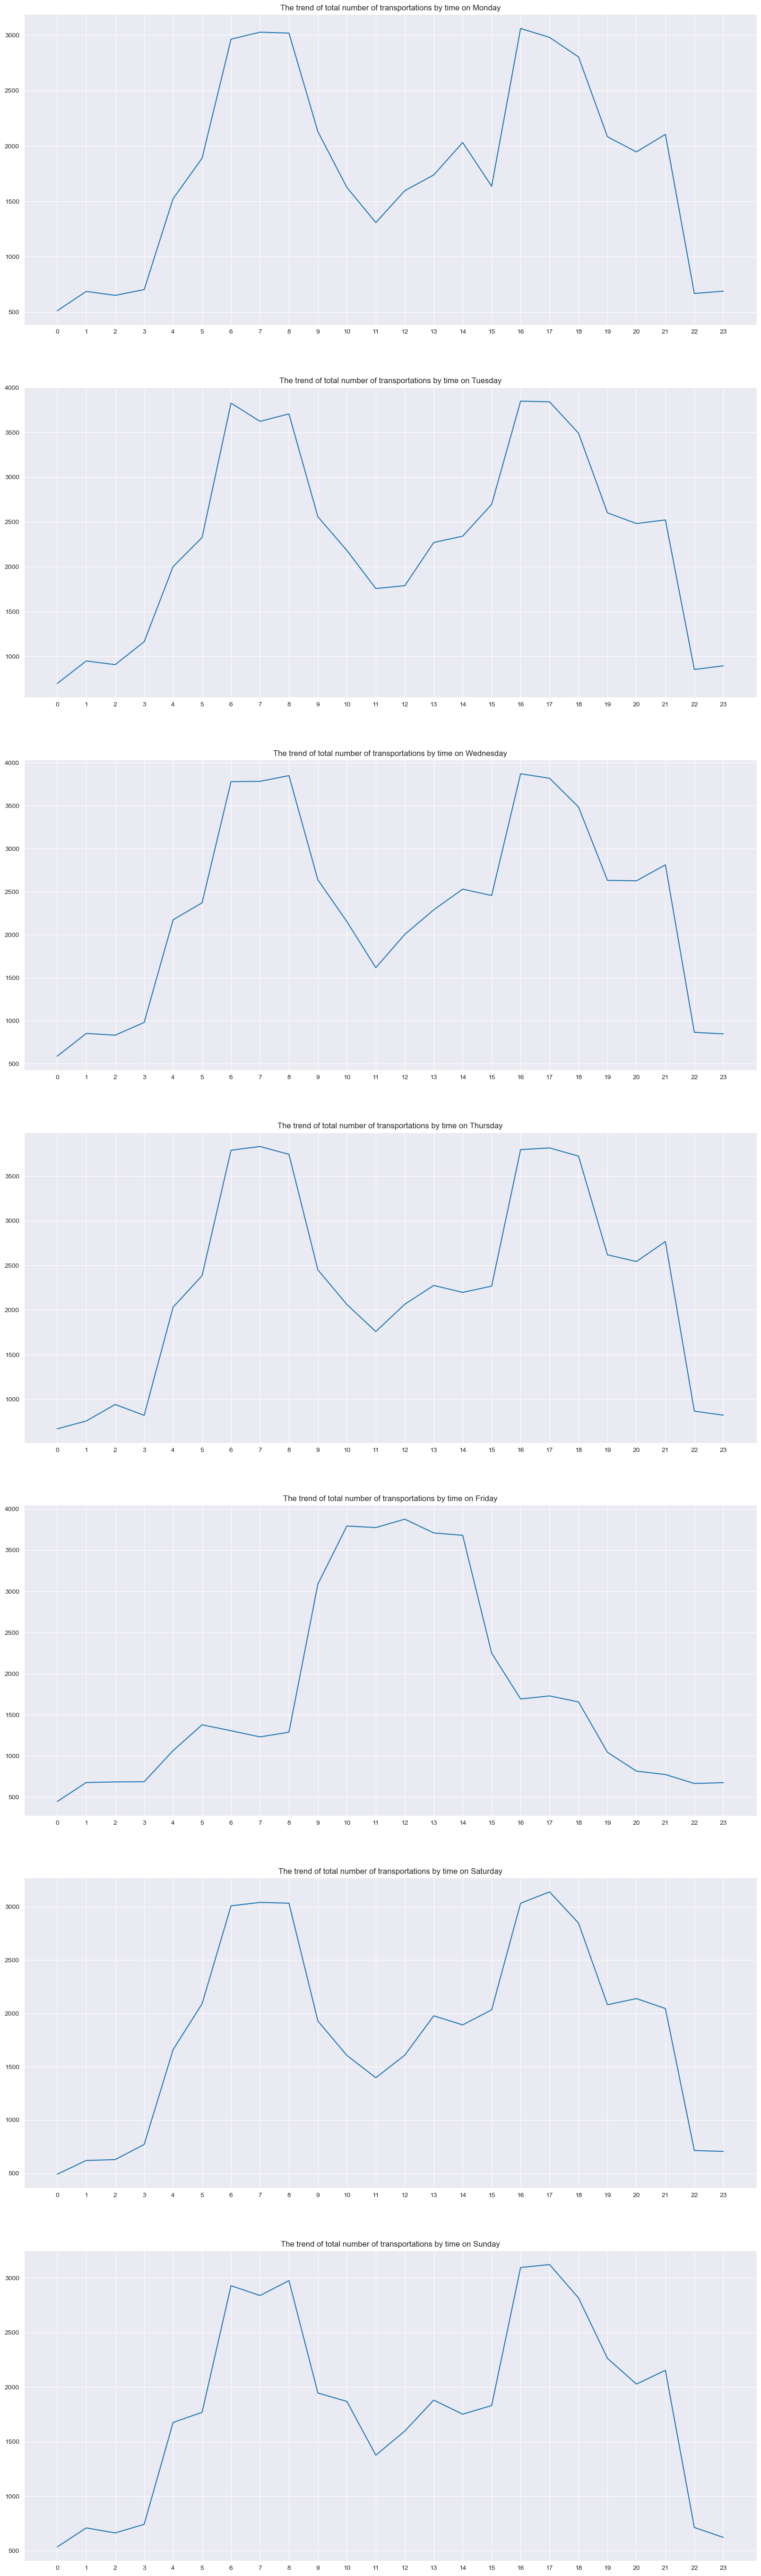

In [ ]:
# Visualising
sns.set_style("darkgrid")

fig, axs = plt.subplots(7,1, figsize =(20,70))
i = 0

for day in grouped_df2["Day of the week"].unique():
    data = grouped_df2.loc[grouped_df2["Day of the week"] == day].groupby("Hour", as_index=False).agg('sum')

    axs[i].plot(data["Hour"], data["Total"])
    axs[i].set_xticks(np.arange(0, 24, 1))

    axs[i].set_title(f"The trend of total number of transportations by time on {day}")
    i += 1

plt.show()

#### Observations:

As it can be seen, the peak hours happened in the morning (6:00 to 8:00) and the evening (15:00 to 18:00)

# 3. Feature Engineering

In [ ]:
data = pd.read_csv('Traffic.csv')

In [ ]:
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

### Dealing with Traffic Situation feature - converting to numeric

In [ ]:
# Distinct Classes in Target variable
data['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [ ]:
data['Traffic Situation'] = data['Traffic Situation'].replace({'low':0, 'normal':1,
                                                              'heavy':2, 'high':3})

### Dealing with day of week feature - converting to numeric

In [ ]:
data['Day of the week'].value_counts()

Day of the week
Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: count, dtype: int64

In [ ]:
#Converting Days of weak into Numeric form
data['Day of the week'] = data['Day of the week'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})

### Breaking time into 2 cols - hour and minute

In [ ]:
test_temp = data.copy()

In [ ]:
#Extracting Specific time-related information from 'Time(24:00 am/pm)' column

data['hour'] = pd.to_datetime(data['Time']).dt.hour #Hour in separate column
data['minute'] = pd.to_datetime(data['Time']).dt.minute #Minute in separate column


# replace 0 with AM
# replace 1 with PM

data['Temp'] = data['Time'].apply(lambda x: x.split(' ')[1]) #Temporary column for AM/PM
data['AM/PM'] = data['Temp'].replace({'AM':0,'PM':1})

C:\Users\sarda\AppData\Local\Temp\ipykernel_318960\4231077955.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hour'] = pd.to_datetime(data['Time']).dt.hour #Hour in separate column
C:\Users\sarda\AppData\Local\Temp\ipykernel_318960\4231077955.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['minute'] = pd.to_datetime(data['Time']).dt.minute #Minute in separate column


In [ ]:
#Now remove 'Temp' and 'Time' columns
data= data.drop(columns = ['Time','Temp'], axis=1)
data

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
0,10,2,31,0,4,4,39,0,0,0,0
1,10,2,49,0,3,3,55,0,0,15,0
2,10,2,46,0,3,6,55,0,0,30,0
3,10,2,51,0,2,5,58,0,0,45,0
4,10,2,57,6,15,16,94,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,9,4,16,3,1,36,56,1,22,45,1
2972,9,4,11,0,1,30,42,1,23,0,1
2973,9,4,15,4,1,25,45,1,23,15,1
2974,9,4,16,5,0,27,48,1,23,30,1


# 4. Mapping Correlations

In [ ]:
data.corr()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
Date,1.000000e+00,-1.672874e-02,-0.013453,-0.005089,-0.015536,0.024734,-0.010679,0.006594,2.814316e-16,2.865092e-17,6.563367e-17
Day of the week,-1.672874e-02,1.000000e+00,-0.002230,0.063583,-0.046031,-0.021895,-0.002953,-0.024423,-2.874150e-16,-5.201713e-17,-1.206884e-16
CarCount,-1.345292e-02,-2.230275e-03,1.000000,0.722539,0.692994,-0.628157,0.970443,0.541331,1.480863e-01,-3.359952e-03,1.026836e-01
BikeCount,-5.088914e-03,6.358283e-02,0.722539,1.000000,0.566364,-0.575399,0.797429,0.407324,1.405488e-01,-7.978481e-03,1.404737e-01
BusCount,-1.553604e-02,-4.603119e-02,0.692994,0.566364,1.000000,-0.546931,0.790705,0.590153,1.657507e-01,-1.615958e-02,1.209151e-01
TruckCount,2.473362e-02,-2.189502e-02,-0.628157,-0.575399,-0.546931,1.000000,-0.555471,-0.049809,-1.695231e-02,-1.119745e-03,9.508203e-05
Total,-1.067861e-02,-2.952752e-03,0.970443,0.797429,0.790705,-0.555471,1.000000,0.631150,1.793136e-01,-8.310162e-03,1.370317e-01
Traffic Situation,6.594190e-03,-2.442348e-02,0.541331,0.407324,0.590153,-0.049809,0.631150,1.000000,1.750623e-01,2.993107e-03,1.246532e-01
hour,2.814316e-16,-2.874150e-16,0.148086,0.140549,0.165751,-0.016952,0.179314,0.175062,1.000000e+00,-1.003662e-17,8.667781e-01
minute,2.865092e-17,-5.201713e-17,-0.003360,-0.007978,-0.016160,-0.001120,-0.008310,0.002993,-1.003662e-17,1.000000e+00,-6.691275e-18


<Axes: >

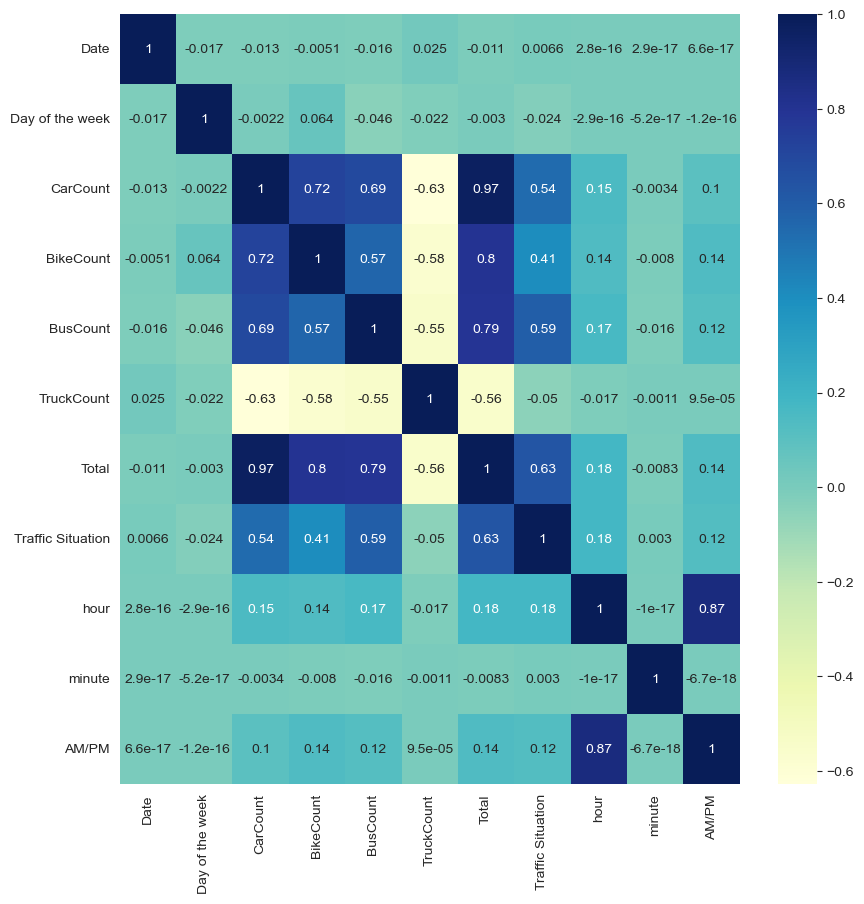

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),
            cmap="YlGnBu",annot=True)

# 5. Preparing the data for modelling

In [ ]:
X= data[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]

y= data['Traffic Situation'].values

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2 , random_state = 0)

# 6. Feature Scaling (Bringing values close and low for better accuracy)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)
train_X
test_X

array([[-0.99650194, -0.96791071, -1.24107921, ...,  1.64372437,
         1.34716853,  0.98085549],
       [-1.65904258, -0.45186513,  0.39423421, ...,  1.06510227,
        -1.32992117,  0.98085549],
       [-1.32777226,  1.09627163, -0.2162828 , ..., -0.23679745,
        -1.32992117, -1.01951818],
       ...,
       [-1.54861914,  0.06418046, -0.12906608, ..., -0.09214192,
         1.34716853, -1.01951818],
       [ 1.43281372,  1.61231721,  0.56866764, ...,  0.48648018,
        -0.43755794,  0.98085549],
       [ 1.32239028,  1.09627163,  0.3070175 , ...,  0.48648018,
         0.4548053 ,  0.98085549]])

# 7. Model Selection using Voting Classifier

In [ ]:
!pip install xgboost --trusted-host pypi.org --trusted-host files.pythonhosted.org


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.1/99.8 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.2/99.8 MB 919.0 kB/s eta 0:01:49
   ---------------------------------------- 0.2/99.8 MB 985.7 kB/s eta 0:01:42
   ---------------------------------------- 0.2/99.8 MB 962.7 kB/s eta 0:01:44
   ---------------------------------------- 0.3/99.8 MB 930.9 kB/s eta 0:01:47
   ---------------------------------------- 0.3/99.8 MB 936.6 kB/s eta 0:01:47
   ---------------------------------------- 0.4/99.8 MB 955.7 kB/s eta 0:01:44
   -----------

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
cl1 = LogisticRegression()
cl2 = RandomForestClassifier()
cl3 = SVC(probability=True)
cl4 = XGBClassifier()
cl5 = AdaBoostClassifier()

voting_cl = VotingClassifier(estimators = [('lr',cl1),('rf',cl2),('svc',cl3),
                                          ('xgb',cl4),('ada',cl5)], voting = 'hard')

voting_cl.fit(train_X, train_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('ada', AdaBoostClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score
voting_pred = voting_cl.predict(test_X)

accuracy = accuracy_score(test_y, voting_pred)

In [ ]:
accuracy

0.9446308724832215

In [ ]:
#Voting classfier using Cross_validation
from sklearn.model_selection import cross_val_score
for clf, label in zip([cl1,cl2,cl3,cl4,cl5],['logistic regression','random forest','support vector','xgboost','adaBoost']):
    scores = cross_val_score(clf, train_X, train_y, scoring='accuracy', cv=5)
    print('Accuracy: ',label,' - ',(scores.mean()))

Accuracy:  logistic regression  -  0.8991596638655462
Accuracy:  random forest  -  0.9953781512605042
Accuracy:  support vector  -  0.9147058823529411
Accuracy:  xgboost  -  0.9983193277310924
Accuracy:  adaBoost  -  0.5609243697478992


In [ ]:
#Solo RandomForest Accuracy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

rfc_pred = rfc.predict(test_X)
accuracy = accuracy_score(test_y, rfc_pred)
accuracy

0.9949664429530202

In [ ]:
#Solo Xgboost Accuracy
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(train_X, train_y)

xgbc_pred = xgbc.predict(test_X)
accuracy = accuracy_score(test_y, xgbc_pred)
accuracy

1.0

#### Observations:

1.`XGBoost Model` is giving 100% accuracy.

2.`RandomForest` accuracy: 99.4%

# 8. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_y, xgbc_pred)
conf_matrix

array([[ 64,   0,   0,   0],
       [  0, 334,   0,   0],
       [  0,   0, 138,   0],
       [  0,   0,   0,  60]], dtype=int64)

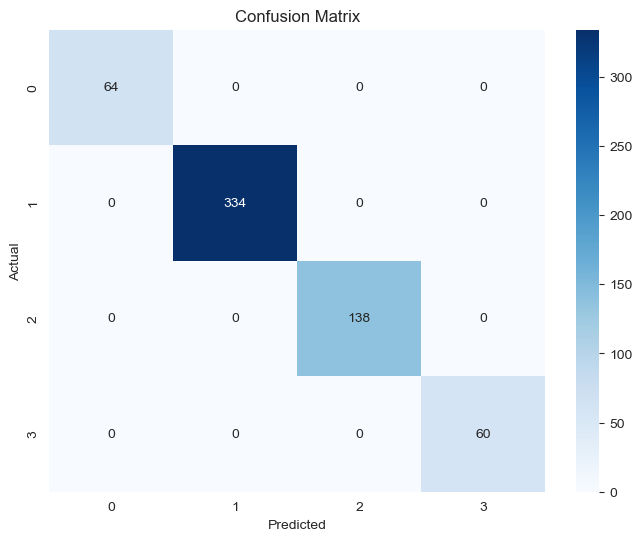

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Observations

1. The diagonal elements (64, 334, 138, 60) represent the number of correct predictions for each class. These values are known as true positives for the respective classes.

2. The off-diagonal elements are all zeros, which means there are no false positives or false negatives; in other words, there are no instances where the model incorrectly predicted the class of an item.

3. The fact that there are only zeros in the off-diagonal elements indicates that the model has achieved perfect classification with 100% accuracy on the dataset it was tested on.